## 데이터 크롤링

### 웹 크롤링을 위해 BeautifulSoup 사용
> - requests는 요청을 받기는 하지만 text로만 받음  
- API는 통신을 위해 정형화 된 데이터 형태의 text  
- 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
- text를 html로 변환하는 모듈이 beautifulSoup

### 간단한 데이터 크롤링으로 기본 개념잡기

[<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_darkmode@2x.png" style="padding-left: 48px" width="303"/>,
 <img alt="스포탈코리아" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/139.png"/>,
 <img alt="파이낸셜뉴스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/014.png"/>,
 <img alt="디지털타임스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/029.png"/>,
 <img alt="서울신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/081.png"/>,
 <img alt="뉴스타파" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/930.png"/>,
 <img alt="시사인" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/308.png"/>,
 <img alt="아이뉴스24" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/031.pn
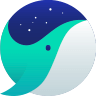
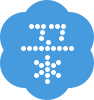

In [2]:
# 필요패키지 import
import numpy as np
import pandas as pd
import requests # 크롤링에 사용하는 패키지
from bs4 import BeautifulSoup # html 변환에 사용함

# url정의

url = 'https://naver.com'

# requsts로 url에 정보요청
# requests 는 한번만 받기
response = requests.get(url)


# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(response.text, 'html.parser')

# html 내에서 우리가 보고 싶은 정보만 선별
html.select('img')

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
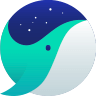
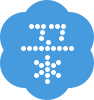

In [3]:
response.text

[<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_darkmode@2x.png" style="padding-left: 48px" width="303"/>,
 <img alt="스포탈코리아" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/139.png"/>,
 <img alt="파이낸셜뉴스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/014.png"/>,
 <img alt="디지털타임스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/029.png"/>,
 <img alt="서울신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/081.png"/>,
 <img alt="뉴스타파" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/930.png"/>,
 <img alt="시사인" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/308.png"/>,
 <img alt="아이뉴스24" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/031.pn
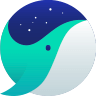
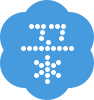

In [4]:
html.select('img')

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  
<span class="news" id="1234">비비고 왕교자</span>

>> 단일 셀렉터  
html.select('span')  
tag : span  
class(별명, 그룹명) : .news  
id(고유값) : #1234

>> 클래스 포함 셀렉터
html.select('span.news')

>> id 포함 셀렉터
id(고유값) : #1234
html.select('span#1234')

#### 복합 셀렉터
    1. 조합 셀렉터
    <span>1</span>
    <span class="txt">2</span>
    <em class="txt">3</em>
    
    태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt 
    li 태그 중에서 id가 name 인 라인을 찾고\ 싶다. : li#name

    2. 경로 셀렉터
    <ul>
        <li><span>이걸 찾으려면?</span></li>
    </ul>
    <span>이건 아님</span>

    ul 태그안 li 태그 안 span 라인을 찾는다
    ul > li > span 혹은 ul li span

In [6]:
url = 'https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=%EC%8A%AC%EC%9D%98%EC%83%9D'

response = requests.get(url)

html = BeautifulSoup(response.text, 'html.parser')

In [9]:
html.select('dd.cont')[0].text

'누군가는 태어나고 누군가는 삶을 끝내는, 인생의 축소판이라 불리는 병원에서 평범한 듯 특별한 하루하루를 살아가는 사람들과 눈빛만 봐도 알 수 있는 20년지기 친구들의 케미스토리를 담은 드라마'

In [10]:
news = html.select('a.tit_main')[:4]

In [11]:
for i in news:
    print(i.text)

 [가리사니] '오징어 게임'과 '슬의생' 되짚어 보기 
 '슬의생' 이익준 실제 모델 "어린이날 이식 사연, 100% 실화" 
 "실제 케미도 최고".. '슬의생' 조정석♥전미도→김대명♥안은진, 두근두근 커플토크[종합] 
 500대 1 뚫었다..'슬의생2' 이세희, 주말 안방 신데렐라 될까 [TEN피플] 


In [12]:
import time

dr_nm =['도깨비', '호텔델루나', '오징어게임']
# 다음 뉴스 페이지
# name = input('검색어를 입력하세요 :')
for name in dr_nm:
    # 순환은 빠름
    print(f'{name} 크롤링 중입니다.')
    url = f'https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q={name}'
    
    # requests로 url정보요청
    # 초당 40~50회 요청
    # 다음에서 기계가 요청하는것으로 알고 막힘
    
    seed = np.random.randint(100)    # 난수로 시드생성
    np.random.seed(seed)             # 시드생성   
    a = np.random.randint(5)         # 시드에서 난수 생성
    time.sleep(a)
    
    response = uest = requests.get(url)

    html = BeautifulSoup(response.text, 'html.parser')

    print(html.select('dd.cont')[0].text)
    
print('크롤링 종료')

도깨비 크롤링 중입니다.
불멸의 삶을 끝내기 위해 인간 신부가 필요한 도깨비, 그와 기묘한 동거를 시작한 기억상실증 저승사자. 그런 그들 앞에 '도깨비 신부'라 주장하는 '죽었어야 할 운명'의 소녀가 나타나며 벌어지는 신비로운 낭만 설화 
호텔델루나 크롤링 중입니다.
엘리트 호텔리어가 운명적인 사건으로 호텔 델루나의 지배인을 맡게 되면서 달처럼 고고하고 아름답지만 괴팍한 사장과 함께 델루나를 운영하며 생기는 특별한 이야기를 그린 드라마
오징어게임 크롤링 중입니다.
456억 원의 상금이 걸린 의문의 서바이벌에 참가한 사람들이 최후의 승자가 되기 위해 목숨을 걸고 극한의 게임에 도전하는 이야기를 담은 넷플릭스 시리즈
크롤링 종료


### 다음에서 로또번호 가져오기

In [14]:
# url 설정
url = 'https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q=1회차%20로또'

In [15]:
# requests로 데이터 요청하기
seed = np.random.randint(100)    # 난수로 시드생성
np.random.seed(seed)             # 시드생성   
a = np.random.randint(5)         # 시드에서 난수 생성
time.sleep(a)
    
response =  requests.get(url)

In [16]:
# html로 변환
html = BeautifulSoup(response.text, 'html.parser')

In [17]:
# 데이터 선별
html.select('div.lottonum')[0].text

' 10 23 29 33 37 40 보너스 16 '

In [19]:
num_list = [i for i in range(1,11)]

lotto_list = []

for num in num_list:
    url = f'https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={num}회차%20로또'
    
    seed = np.random.randint(100)    # 난수로 시드생성
    np.random.seed(seed)             # 시드생성   
    a = np.random.randint(5)         # 시드에서 난수 생성
    time.sleep(a)
    
    response =  requests.get(url)
    html = BeautifulSoup(response.text, 'html.parser')
    a = html.select('div.lottonum')[0].text, f'{num}회차'
    lotto_list.append(a)

In [20]:
lotto_list

[(' 10 23 29 33 37 40 보너스 16 ', '1회차'),
 (' 9 13 21 25 32 42 보너스 2 ', '2회차'),
 (' 11 16 19 21 27 31 보너스 30 ', '3회차'),
 (' 14 27 30 31 40 42 보너스 2 ', '4회차'),
 (' 16 24 29 40 41 42 보너스 3 ', '5회차'),
 (' 14 15 26 27 40 42 보너스 34 ', '6회차'),
 (' 2 9 16 25 26 40 보너스 42 ', '7회차'),
 (' 8 19 25 34 37 39 보너스 9 ', '8회차'),
 (' 2 4 16 17 36 39 보너스 14 ', '9회차'),
 (' 9 25 30 33 41 44 보너스 6 ', '10회차')]

In [ ]:
requests.codes.ok
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

### **네이버 키워드로 검색한 결과를 크롤링**

In [22]:
key_word = input('키워드를 입력하세요 : ')
url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={key_word}'
response =  requests.get(url)
html = BeautifulSoup(response.text, 'html.parser')


for name in html.select('a.api_txt_lines'):
    print(name.text, name.attrs['href'])
    
    temp_url = name.attrs["href"]

키워드를 입력하세요 : 세탁기
LG 트윈워시 드럼세탁기 분해 청소 비용, 가격 및 후기 https://blog.naver.com/aejiniyam/222473577816
설치까지 완벽한 위닉스 세탁기건조기 환영해 https://blog.naver.com/dngusghk/222470214924
세탁기세제 살결에도 해가없어 https://cafe.naver.com/newkidsbattle/403868
삼성 세탁기(그랑데 AI)실망 https://cafe.naver.com/jookjeonmom/1253654
매달 세탁기청소하기 https://blog.naver.com/heaven1507/222519531406
이사하시나요? 세탁기 냉장고등 가전이 필요하신가요? https://adcr.naver.com/adcr?x=1ZV1IwIO37vWnFhLnBFCwf///w==ky7xaGfrIWC728TPVFTKdKhDikgpThWNqeRMaNbqv71l+Oda0dCJmkRx+6qxiY9RjinAONievOF18veWC3V9KHyn9HSqsIfIQdFidFIyYWY5KHCD8ONvultTKSHw8Gc92fVeEXDC7gaz4OLP8DnCp40krCuVBxsMRADhjXLUoxx/p47aLsQ8vQV7JJ10hH4wclLq0PSFyLAVBdLV6VLKzJcGWC+C4Ta02YMr9YaJnXw6OkWXkfFZIehDfTjaZV5/8BWXVbzeqFD8o9RVuC5q7jJyreREEiH3E66WjovXrjoLv53otd8mA2MyA251SdLK+06xxYZkeOMUukugcBEAC70PIUPkzI4Hq0Rn2mkIt9O/mj9irS3FRFyKSisUtgf6rtAkm2iH59zPkdOQxG51d/ClZHtYY2ImBN+FdrsS/7bmRWvAGjpy9VJlEjYZ28zLNSetrtBG9STnbfaRx9ENPVINQ3fkZpoGcUIqwX/XCVEXj6WVbswvp8QWcTp9cCEFQ9jFxWvtue7B3Wd0vOrX055naxMl6dfkATfUSQYWAG9BXdZkjtTM93OqSLn

### **관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR**

In [23]:
code = '002020'

url = f'https://finance.naver.com/item/main.nhn?code={code}'

# requests 요청
response = requests.get(url)

# html 변환

html = BeautifulSoup(response.text, 'html.parser')

# 시가총액, 외국인 소진률, PER, PBR
print('시가총액 : ', html.select('em#_market_sum')[0].text.strip())
print('외국인 소진률 : ' , html.select('div.gray em')[2].text)
print('PER : ' , html.select('em#_per')[0].text)
print('PBR : ' , html.select('em#_pbr')[0].text)

시가총액 :  5,202
외국인 소진률 :  11.50%
PER :  3.68
PBR :  0.68


In [24]:
import time

stock_list = ['005930', '002020', '323410']
total_data = []

for code in stock_list:
    time.sleep(np.random.randint(5))
    url = f'https://finance.naver.com/item/main.nhn?code={code}'
    print(f'{code} 크롤링 중입니다.')
    # requests 요청
    response = requests.get(url)

    # html 변환

    html = BeautifulSoup(response.text, 'html.parser')
    stock_data = []
    stock_data.append(html.select('em#_market_sum')[0].text.strip().replace('\n', '').replace('\t', ''))
    stock_data.append(html.select('div.gray em')[2].text)
    stock_data.append(html.select('em#_per')[0].text)
    stock_data.append(html.select('em#_pbr')[0].text)
    total_data.append(stock_data)


    
print('크롤링 종료')

005930 크롤링 중입니다.
002020 크롤링 중입니다.
323410 크롤링 중입니다.
크롤링 종료


In [25]:
total_data

[['455조4,944', '52.00%', '16.07', '1.89'],
 ['5,202', '11.50%', '3.68', '0.68'],
 ['33조5,421', '5.51%', '228.48', '9.95']]

In [26]:
df = pd.DataFrame(total_data,
                 index = ['삼성전자', '코오롱', '카카오뱅크'],
                 columns = ['시가총액', '외국인소진률', 'PER', 'PBR'])
df

,시가총액,외국인소진률,PER,PBR
삼성전자,"455조4,944",52.00%,16.07,1.89
코오롱,"5,202",11.50%,3.68,0.68
카카오뱅크,"33조5,421",5.51%,228.48,9.95


## **동적페이지 크롤링**
> 최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음  
동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 주식 시세 데이터 크롤링

In [27]:
# 동적페이지의 숨은 URL
url = 'https://finance.naver.com/item/sise_day.naver?code=002020&page=1'

info = {'referer' : 'https://finance.naver.com/item/sise_day.naver?code=002020&page=2',
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}

response = requests.get(url, headers = info)

html = BeautifulSoup(response.text, 'html.parser')

In [28]:
# 날짜 인덱스 활용
index = [date.text for date in html.select('span.p10')]
index

['2021.09.28',
 '2021.09.27',
 '2021.09.24',
 '2021.09.23',
 '2021.09.17',
 '2021.09.16',
 '2021.09.15',
 '2021.09.14',
 '2021.09.13',
 '2021.09.10']

In [29]:
# 가격정보 추출
price = np.array([price.text.strip() for price in html.select('span.p11')]).reshape((-1, 6))
price

array([['41,200', '150', '41,250', '42,900', '41,150', '278,265'],
       ['41,050', '750', '40,250', '41,450', '40,100', '146,508'],
       ['40,300', '1,650', '42,500', '42,750', '40,100', '316,511'],
       ['41,950', '2,050', '42,700', '43,800', '41,700', '335,625'],
       ['44,000', '1,150', '42,500', '46,350', '41,650', '1,094,420'],
       ['42,850', '3,000', '40,200', '42,850', '39,400', '514,556'],
       ['39,850', '1,450', '41,250', '42,550', '39,350', '491,878'],
       ['41,300', '200', '41,100', '42,250', '40,200', '546,760'],
       ['41,500', '3,750', '44,850', '45,800', '41,200', '1,164,685'],
       ['45,250', '9,350', '36,050', '46,650', '36,050', '3,800,508']],
      dtype='<U9')

In [32]:
# 전체 데이터 tah
# 날짜는 p10
total_data = np.array([item.text.strip() for item in html.select('span.tah')]).reshape((-1, 7))

total_data

array([['2021.09.28', '41,200', '150', '41,250', '42,900', '41,150',
        '278,265'],
       ['2021.09.27', '41,050', '750', '40,250', '41,450', '40,100',
        '146,508'],
       ['2021.09.24', '40,300', '1,650', '42,500', '42,750', '40,100',
        '316,511'],
       ['2021.09.23', '41,950', '2,050', '42,700', '43,800', '41,700',
        '335,625'],
       ['2021.09.17', '44,000', '1,150', '42,500', '46,350', '41,650',
        '1,094,420'],
       ['2021.09.16', '42,850', '3,000', '40,200', '42,850', '39,400',
        '514,556'],
       ['2021.09.15', '39,850', '1,450', '41,250', '42,550', '39,350',
        '491,878'],
       ['2021.09.14', '41,300', '200', '41,100', '42,250', '40,200',
        '546,760'],
       ['2021.09.13', '41,500', '3,750', '44,850', '45,800', '41,200',
        '1,164,685'],
       ['2021.09.10', '45,250', '9,350', '36,050', '46,650', '36,050',
        '3,800,508']], dtype='<U10')

In [35]:
# 컬럼 정보에 해당하는 데이터 가져오기
columns = [col_nm.text for col_nm in html.select('th')]
columns = columns[1:]

In [36]:
df = pd.DataFrame(price,
                 index = index,
                 columns = columns)
df

,종가,전일비,시가,고가,저가,거래량
2021.09.28,"41,200",150,"41,250","42,900","41,150","278,265"
2021.09.27,"41,050",750,"40,250","41,450","40,100","146,508"
2021.09.24,"40,300","1,650","42,500","42,750","40,100","316,511"
2021.09.23,"41,950","2,050","42,700","43,800","41,700","335,625"
2021.09.17,"44,000","1,150","42,500","46,350","41,650","1,094,420"
2021.09.16,"42,850","3,000","40,200","42,850","39,400","514,556"
2021.09.15,"39,850","1,450","41,250","42,550","39,350","491,878"
2021.09.14,"41,300",200,"41,100","42,250","40,200","546,760"
2021.09.13,"41,500","3,750","44,850","45,800","41,200","1,164,685"
2021.09.10,"45,250","9,350","36,050","46,650","36,050","3,800,508"


In [37]:
# 콤마 제거
def remove_str(x):
    return x.replace(',', '')
remove_str('안녕,하세요')

'안녕하세요'

<AxesSubplot:>

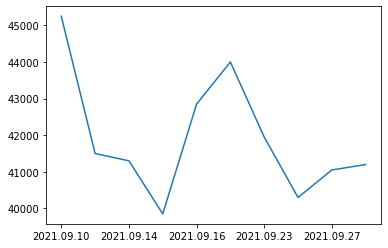

In [38]:
# 함수 적용
df['종가'] = df['종가'].apply(remove_str)
# 타입 변환
df['종가'] = df['종가'].astype(int)
# 종가 그래프
df['종가'].sort_index().plot()

### 네이버 데이터랩 인기검색어 크롤링

In [39]:
url = 'https://datalab.naver.com/shoppingInsight/getKeywordRank.naver?timeUnit=date&cid=50000001'
info = {
    'referer': 'https://datalab.naver.com/',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36'
}
response = requests.post(url, headers=info)
# json 데이터 파싱
import json
data = json.loads(response.text)
for item in data[0]['ranks']:
    print(item['keyword'])

나이키운동화
크록스
운동화
모자
카드지갑
뉴발란스327
나이키에어포스
나이키데이브레이크
gwf-a1000
핸드폰가방


### 파파고 API

In [45]:
def papago():
    
    
    x = str(input('번역이 필요한 한국어를 입력하세요 : '))
    
    
    url = 'https://openapi.naver.com/v1/papago/n2mt'

    # 헤더 정보 정의
    info = {
        'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'X-Naver-Client-Id': 'mqw8sh1TbjNg4nhVD1av',
        'X-Naver-Client-Secret': '4RsisDpdjH'

    }

    data = {
        'source' : 'ko',
        'target': 'en',
        'text' : x
    }

    response = requests.post(url, headers = info, data = data)
    result =json.loads(response.text)
    print(result['message']['result']['translatedText'])

In [46]:
papago()

번역이 필요한 한국어를 입력하세요 : 안녕하세요
Hello


### 공공데이터

In [47]:
url = 'http://smarttour.junggu.seoul.kr//junggu/openapi/culture.do'
response = requests.get(url)

data = json.loads(response.text)

for i in range(10):
    print(data['spot_Data'][i]['spot_Address'][1])

서울특별시 중구 퇴계로36길 10(필동2가 80-2)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 소월로 91(남대문로5가 471)
서울특별시 중구 장충동2가 산14-21
서울특별시 중구 남산공원길 125-72(예장동 산5-6)
서울특별시 중구 예장동 8-1
서울특별시 중구 예장동 8-1
서울특별시 중구 필동로1길 30(장충동2가 192-5)
서울특별시 중구 장충단로 72(장충동2가 201-6)


## selenium(셀레니움)
    
> 웹 어플리케이션 테스트를 위한 프레임워크.  
다양한 브라우저 작동을 지원하며 크롤링에도 활용가능.  
정적, 동적페이지 크롤링으로도 접근이 불가능한 데이터에 접근할 때 유용하게 사용  
현존하는 거의 모든 웹브라우저를 다양한 언어를 통해 제어 가능

### selenium Setting

> 사용해야 하는 브라우저의 웹드라이버 다운 필요  
크롬 환경설정 -> 크롬 정보로 크롬 버전 확인 필요  
    
>> 크롬 드라이버 다운로드  
https://chromedriver.chromium.org/downloads
    
셀레니움은 이 웹 드라이버 API를 제어하는 파이썬 패키지입니다.

### 간단한 브라우저 컨트롤로 기본 개념잡기
강의자료에 포함 된 코드는 강의자료 작성 시 확인 된 내용으로 현재시점의 웹 소스코드 변경 시 작동하지 않을 수 있습니다.

In [49]:
# 셀레니움 import
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

In [51]:
# 크롬창 열기
driver = webdriver.Chrome('./chromedriver.exe')

In [52]:
# 설정한 url로 데이터 get함수로 요청
url = 'https://naver.com'
driver.get(url)

In [53]:
# 키워드를 입력받아 검색창의 xpath에 send_keys 함수로 키워드 입력 
key_word = input('키워드를 입력하세요 : ') + '\n'
# 녹생창에 입력밧 지우기는 clear
# 입력은 send_keys
driver.find_element_by_xpath('//*[@id="query"]').clear
driver.find_element_by_xpath('//*[@id="query"]').send_keys(key_word)

키워드를 입력하세요 : 오징어게임


In [54]:
# 검색결과의 news 탭 클릭
driver.find_element_by_xpath('//*[@id="lnb"]/div[1]/div/ul/li[7]/a').click()

### 네이버 로그인 시도

In [ ]:
url = 'https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com'
driver.get(url)

In [ ]:
import time

# 로그인 페이지 이동
id = input('아이디를 입력하세요 : ')
password = input('비밀번호를 입력하세요 : ')

# 로그인 정보 입력

driver.find_element_by_xpath('//*[@id="id"]').send_keys(id)
time.sleep(3)
driver.find_element_by_xpath('//*[@id="pw"]').send_keys(password)
time.sleep(3)
driver.find_element_by_xpath('//*[@id="log.login"]/span').click()

### 인스타그램 크롤링

In [ ]:
driver = webdriver.Chrome('./chromedriver.exe')# 컨트롤 할 크롬 브라우저 생성

In [ ]:
# url 페이지 이동
url = 'https://www.instagram.com'
driver.get(url)

In [ ]:
id = input('아이디를 입력하세요 : ')
password = input('비밀번호를 입력하세요 : ')

driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input').send_keys(id)
time.sleep(3)
driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input').send_keys(password)
time.sleep(3)
driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[3]').click()

In [ ]:
driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div/div/div/button').click()

In [ ]:
# 알림설정 팝업창 나중에 하기 클릭
driver.find_element_by_xpath('/html/body/div[6]/div/div/div/div[3]/button[2]').click()

In [ ]:
# 검색 키워드로 크롤링을 하기 위해 검색어 입력
driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input').send_keys('공릉\n')

In [ ]:
# 첫번째 항목 접근
driver.find_element_by_xpath('//*[@id="f21fea6d965800c"]/div').click()

In [ ]:
# 첫번째 포스팅 클릭
driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]').click()

In [ ]:
# 포스팅 image url 따오기
image = driver.find_element_by_css_selector('img.FFVAD')

In [ ]:
# image 변수에서 src 속성에 접근
image_url = image.get_attribute('src')

In [ ]:
# 이미지 저장을 위한 패키지
import urllib
# 이미지 저장
urllib.request.urlretrieve(image_url, './test.jpg')